https://youtu.be/BkesMPmhh_E?t=654

Week-1 | Tutorial | MLT

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# from scipy.io import arff
# data, meta = arff.loadarff('mnist_784.arff')
# df = pd.DataFrame(data)
# df.to_csv('mnist_784.csv', index=False)

In [3]:
import ast
df = pd.read_csv('mnist_784.csv')
df['class'] = df['class'].apply(lambda x: int(ast.literal_eval(x)))
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
df_train = df.iloc[:60000, :]
df_test = df.iloc[60000:, :]

df_train.shape
df_test.shape

(60000, 785)

(10000, 785)

In [5]:
X_train = df_train[df_train['class'] == 2].iloc[:100, :-1].values.T
X_test = df_test[df_test['class'] == 2].iloc[:1, :-1].values.T

X_train.shape
X_test.shape

(784, 100)

(784, 1)

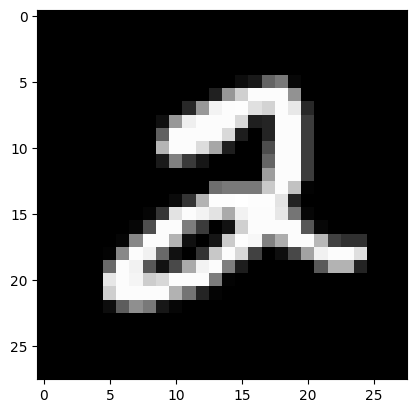

In [6]:
plt.imshow(X_train[:, 0].reshape(28, 28), cmap='gray')

In [10]:
X_mean = X_train.mean(axis=1, keepdims=True)

X_train.shape
X_mean.shape

X_centered = X_train - X_mean
X_test = X_test - X_mean

(784, 100)

(784, 1)

In [ ]:
n = X_centered.shape[1]
C = X_centered @ X_centered.T / n
C.shape

(784, 784)

In [12]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors.T[sorted_indices]

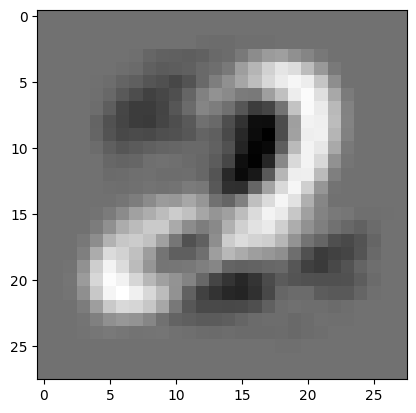

In [13]:
plt.imshow(eigenvectors[0].reshape(28, 28), cmap='gray')

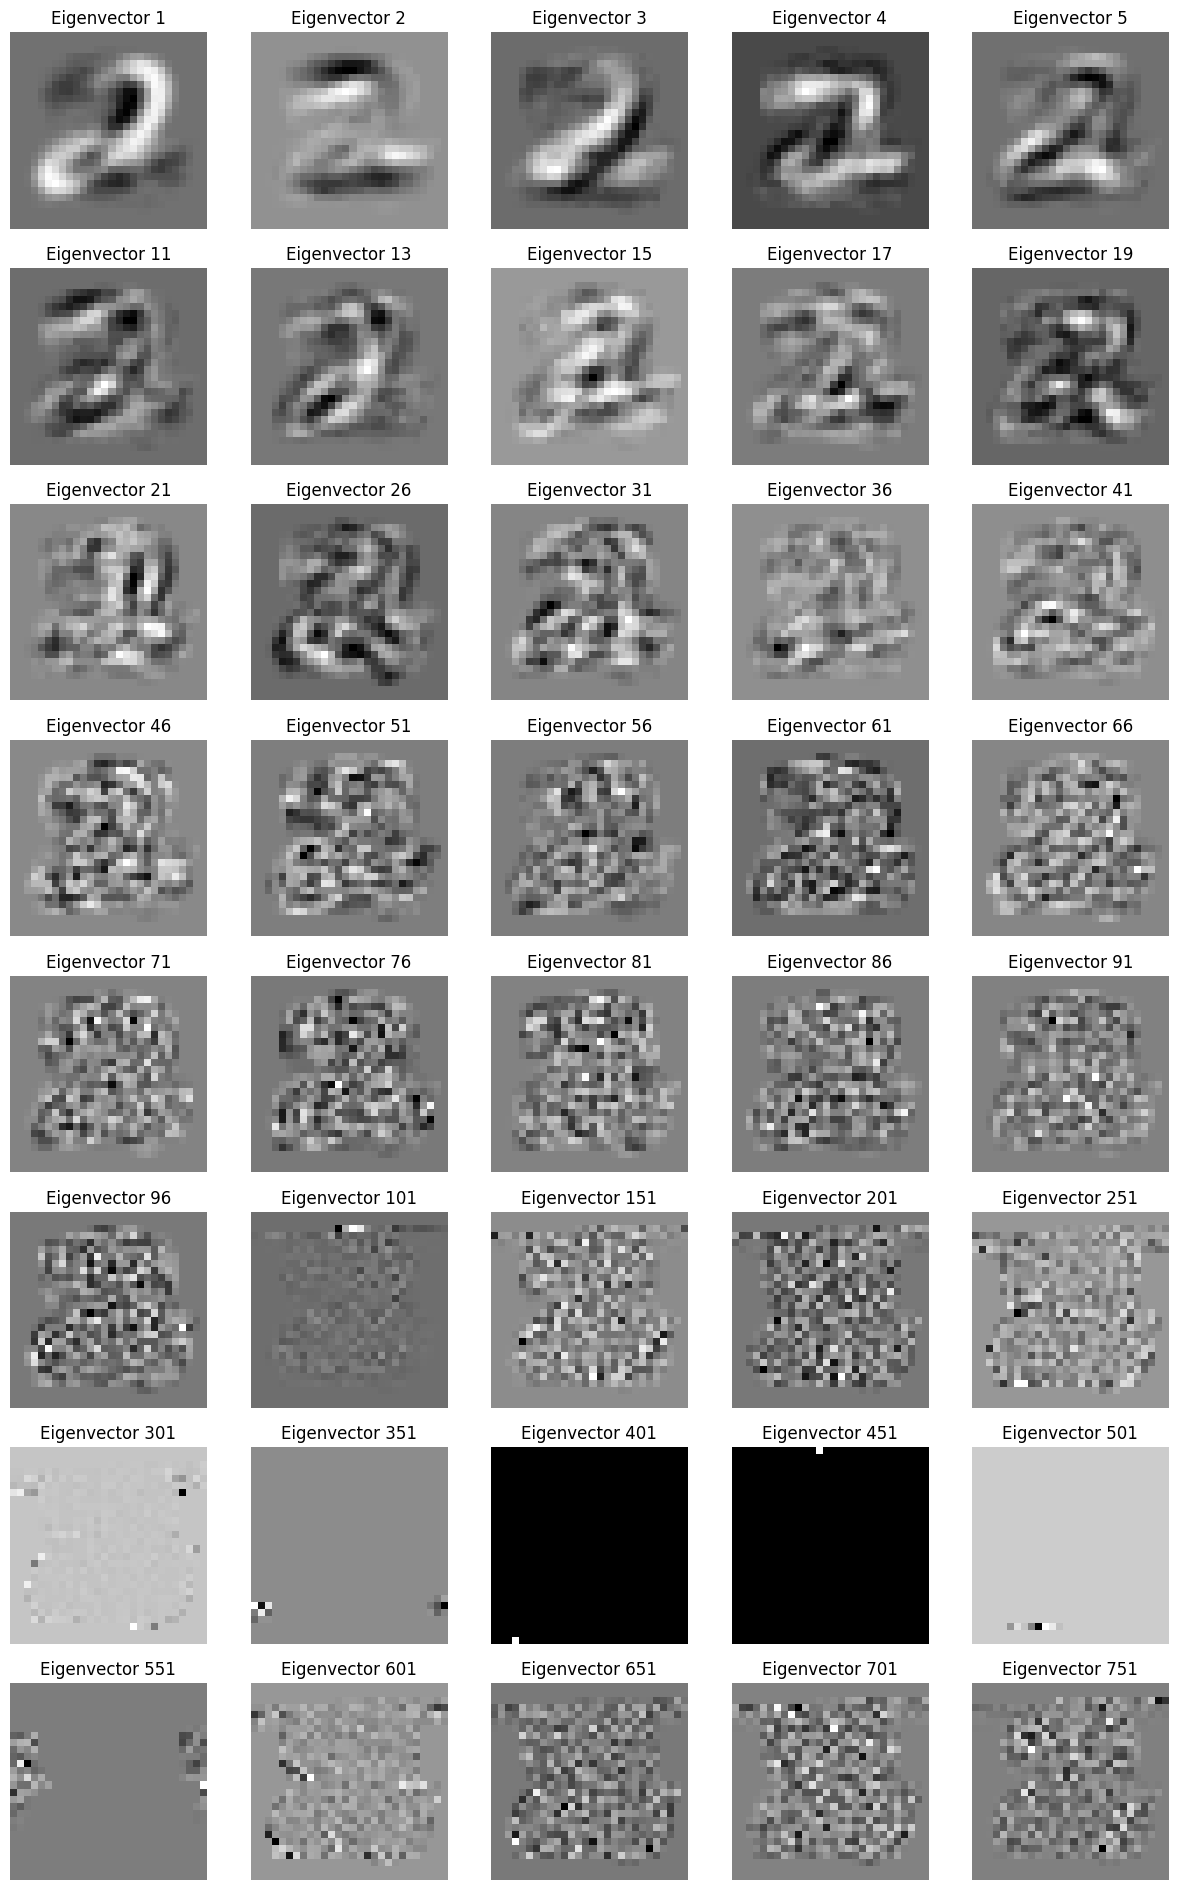

In [14]:
def plot_eigenvectors(eigenvectors, selected_indices):
  import math

  num_vectors = len(selected_indices)
  rows = math.ceil(num_vectors / 5)
  plt.figure(figsize=(15, 3 * rows))

  for idx, eigen_idx in enumerate(selected_indices):
    plt.subplot(rows, 5, idx + 1)
    plt.imshow(eigenvectors[eigen_idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Eigenvector {eigen_idx + 1}')


# Define the indices of eigenvectors to plot
selected_indices = (
    list(range(5)) +
    list(range(10, 20, 2)) +
    list(range(20, 100, 5)) +
    list(range(100, 784, 50))
)

# Plot the selected eigenvectors
plot_eigenvectors(eigenvectors, selected_indices)

In [15]:
def find_k_for_variance_threshold(eigenvalues, threshold=0.95):
  total_variance = np.sum(eigenvalues)
  cumulative_variance = np.cumsum(eigenvalues)
  k = np.argmax(cumulative_variance >= threshold * total_variance) + 1
  return k


for threshold in [0.2, 0.5, 0.8, 0.95, 1]:
  k = find_k_for_variance_threshold(eigenvalues, threshold)
  print(f'Number of components for {int(threshold * 100)}% variance: {k}')

Number of components for 20% variance: 2
Number of components for 50% variance: 6
Number of components for 80% variance: 22
Number of components for 95% variance: 53
Number of components for 100% variance: 99


(784, 1)

(53, 784)

(53, 1)

(784, 1)

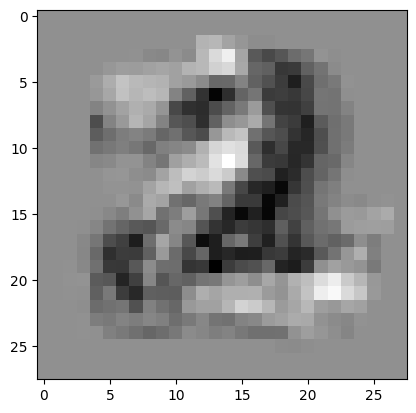

In [16]:
k = find_k_for_variance_threshold(eigenvalues, 0.95)

X_test.shape
eigenvectors[:k].shape

X_test_coeff = eigenvectors[:k] @ X_test
X_test_coeff.shape

X_test_reconstructed = eigenvectors[:k].T @ X_test_coeff + X_mean
X_test_reconstructed.shape

plt.imshow(X_test_reconstructed.reshape(28, 28), cmap='gray')

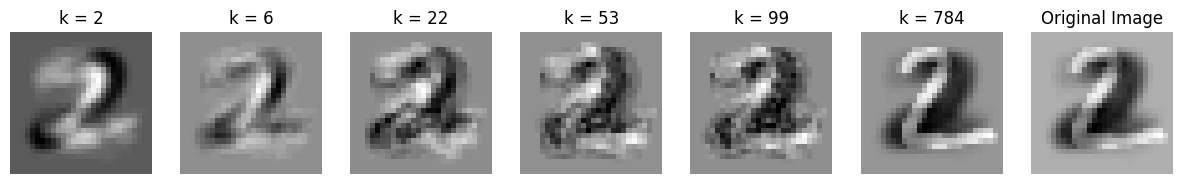

In [18]:
def plot_reconstructed_images(X_test, eigenvectors, k_values):
  num_k = len(k_values)
  plt.figure(figsize=(15, 3))

  for i, k in enumerate(k_values):
    # Project and reconstruct the image
    X_test_coeff = eigenvectors[:k] @ X_test
    X_test_reconstructed = eigenvectors[:k].T @ X_test_coeff + X_mean

    # Plot the reconstructed image
    plt.subplot(1, num_k + 1, i + 1)
    plt.imshow(X_test_reconstructed.reshape(28, 28), cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

  # Plot the original image
  plt.subplot(1, num_k + 1, num_k + 1)
  plt.imshow(X_test.reshape(28, 28), cmap='gray')
  plt.title('Original Image')
  plt.axis('off')


thresholds = [0.2, 0.5, 0.8, 0.95, 1.0]
k_values = [find_k_for_variance_threshold(eigenvalues, t) for t in thresholds]
k_values.extend([len(eigenvectors)])  # to include all components
plot_reconstructed_images(X_test, eigenvectors, k_values)